<a href="https://colab.research.google.com/github/AndreuSerraSastre/03MAIR---Algoritmos-de-Optimizacion-2023/blob/main/Actividad_guiada_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
import matplotlib.pyplot as plt
import time

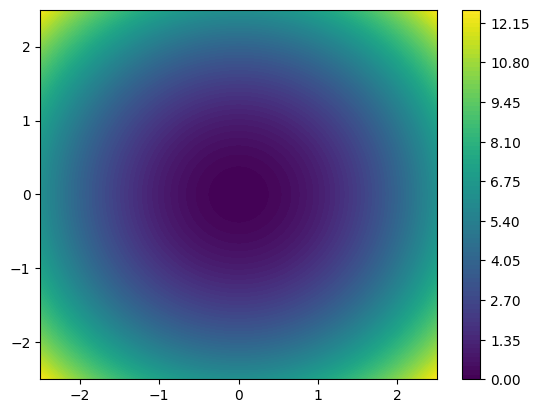

In [13]:
# Primera prueba
f1 = lambda X: X[0]**2 + X[1]**2
df1 = lambda X: np.array([2*X[0], 2*X[1]])

resolucion = 100
rango = 2.5
X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))
for ix, x in enumerate(X):
    for iy, y in enumerate(Y):
        Z[iy, ix] = f1([x, y])

plt.contourf(X, Y, Z, resolucion)
plt.colorbar()

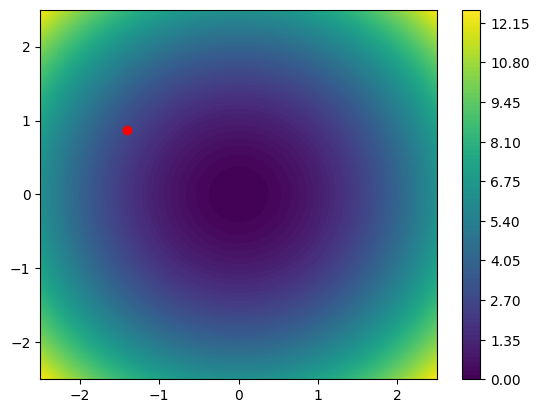

In [14]:
P1 = [random.uniform(-rango, rango), random.uniform(-rango, rango)]
plt.contourf(X, Y, Z, resolucion)
plt.colorbar()
plt.plot(P1[0], P1[1], "o", c="red")

[-2e-323, 2e-323] 0.0


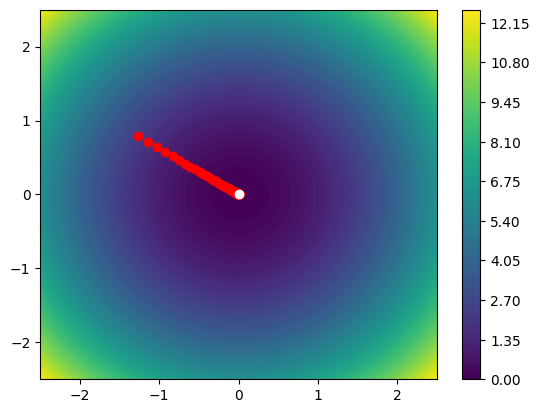

In [15]:
TA1 = 0.05

for _ in range(10000):
    grad = df1(P1)
    P1[0], P1[1] = P1[0] - TA1*grad[0], P1[1] - TA1*grad[1]
    plt.plot(P1[0], P1[1], "o", c="red")

plt.plot(P1[0], P1[1], "o", c="white")
plt.contourf(X, Y, Z, resolucion)
plt.colorbar()
print(P1, f1(P1))

#Descenso del gradiente. Practica
##Práctica para mejorar nota:
- Minimizar la función por descenso del gradiente



---


$$f(x) = \sin\left(\frac{1}{2}x^2 - \frac{1}{4}y^2 + 3\right) \cdot \cos\left(2x + 1 - e^y\right)$$

In [16]:
# Segunda prueba
f2 = lambda X: np.sin(1/2*X[0]**2 - 1/4*X[1]**2 + 3) * np.cos(2*X[0] + 1 - np.exp(X[1]))

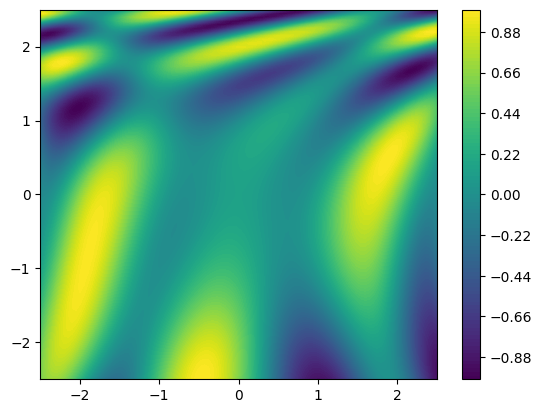

In [17]:
resolucion = 100
rango = 2.5
X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))
for ix, x in enumerate(X):
    for iy, y in enumerate(Y):
        Z[iy, ix] = f2([x, y])

plt.contourf(X, Y, Z, resolucion)
plt.colorbar()

In [18]:
def df2(PUNTO):
    h = 0.01
    grad = np.zeros(2)
    for it in range(2):
        T_plus = np.copy(PUNTO)
        T_minus = np.copy(PUNTO)
        T_plus[it] = T_plus[it] + h
        T_minus[it] = T_minus[it] - h
        grad[it] = (f2(T_plus) - f2(T_minus)) / (2*h)
    return grad

[0.38974721773644205, 1.3008412731307537]


In [38]:
def gradient_descent(starting_point, gradient_func, learning_rate=0.1, max_iter=1000, tolerance=1e-6):
    point = starting_point
    for i in range(max_iter):
        grad = gradient_func(point)
        if np.linalg.norm(grad) < tolerance:
            print("El algoritmo de descenso de gradiente convergió en la iteración ", i)
            break
        learning_rate = learning_rate / (1 + i * 0.001)  # Reducción dinámica de la tasa de aprendizaje
        point = point - learning_rate * grad
        plt.plot(point[0], point[1], "o", c="red")
    return point

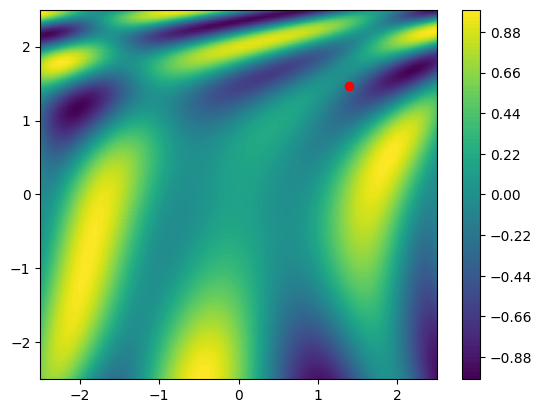

In [41]:
P2 = [random.uniform(-rango, rango), random.uniform(-rango, rango)]
plt.plot(P2[0], P2[1], "o", c="red")
plt.contourf(X, Y, Z, resolucion)
plt.colorbar()

El algoritmo de descenso de gradiente convergió en la iteración  36
[2.17107018 1.67251705] -0.9983536179965395


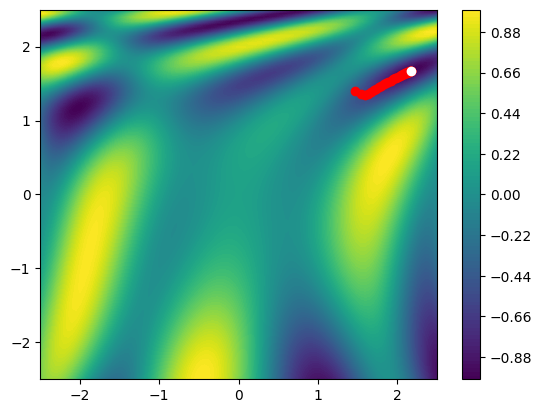

In [44]:
resultado = gradient_descent(P2, df2, 0.05, 10000, 0.1)
plt.plot(resultado[0], resultado[1], "o", c="white")
plt.contourf(X, Y, Z, resolucion)
plt.colorbar()
print(resultado, f2(resultado))